In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output 

In [3]:
# Create a custom function for data transformation
# May as well import all of these features into the initial dataframe, you can cut it down..
# ..when you do the X,y train/test split
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]


In [4]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df1 = df_transformation(df1)


df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df2 = df_transformation(df2)


df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df3 = df_transformation(df3)



# reading files from 9/20 dataset
first_file = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
first_file = df_transformation(first_file)


second_file = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
second_file = df_transformation(second_file)


# reading file from 9/22 dataset
df4 = pd.read_csv('SimData_2022.09.22_17.11.56.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df4 = df_transformation(df4)

C:\Users\twolf\AppData\Local\Temp\ipykernel_14548\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_14548\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_14548\17026926.py:3: SettingWithCopyWarning: 
A valu

In [5]:
#Combine files
df = pd.concat([first_file,second_file, df1, df2, df3, df4]).reset_index()

# Dataframe for Surface Taxi Maneuver

In [15]:
df_s = df.copy()
df_s['surface'] = 0

df_s.loc[(df_s['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['surface']] = 1
df_s.loc[(df_s['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['surface']] = 1
df_s.loc[(df_s['datetime'].between('2022-09-20 20:25:50' , '2022-09-20 20:27:54' , inclusive='both')),['surface']] = 1
df_s.loc[(df_s['datetime'].between('2022-09-22 21:16:37' , '2022-09-22 21:19:56' , inclusive='both')),['surface']] = 1
df_s.loc[(df_s['datetime'].between('2022-09-22 21:43:16' , '2022-09-22 21:43:41' , inclusive='both')),['surface']] = 1

In [16]:
df_s['surface'].value_counts()

0    6583
1     637
Name: surface, dtype: int64

# Edit DF for ML, Class Balance, Select features

In [17]:
#Edit the model features to whatever you want to include in your model
all_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque', 'surface']

df_s = df_s[all_features]

In [18]:
df1 = df_s[(df_s['surface'] == 0)].sample(n=637, replace=False, random_state=123458)
df2 = pd.concat([df_s[(df_s['surface'] == 1)], df1], ignore_index = True)
df2 = df2.sample(frac=1)

In [19]:
df2['surface'].value_counts()

1    637
0    637
Name: surface, dtype: int64

In [20]:
df2.head()

,hasWeightOnWheels,absoluteAltitude,magneticHeading,groundSpeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,surface
461,1.0,0.303667,24.975600,18.606233,-0.062233,0.042933,-6.862600,-2.696867,36.374700,-2.333767,47.015300,41.160300,41.160300,1
1050,0.0,131.230488,352.940439,12.785244,54.006341,0.385951,-11.055171,-5.412220,45.526951,-8.062073,55.116000,58.944049,58.944049,0
707,1.0,0.043714,24.463829,0.213371,0.003000,-0.239771,0.282514,0.014457,3.615943,-20.803200,46.329314,40.013743,40.013743,0
607,1.0,0.314737,281.987105,0.740658,-1.757395,0.627368,-32.803816,2.915105,26.237132,-1.479289,39.740158,27.395842,27.395842,1
973,1.0,0.050000,236.631953,0.000000,0.000000,0.001488,-16.917419,2.341023,6.156000,24.391791,43.266721,33.740535,33.740535,0


# SVM Surface Taxi

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.utils import resample

In [22]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['surface']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [23]:
#SVC
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm = SVC()


svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.97
Accuracy of SVM classifier on test set: 0.9525


In [24]:
y_pred=svm.predict(X_test)

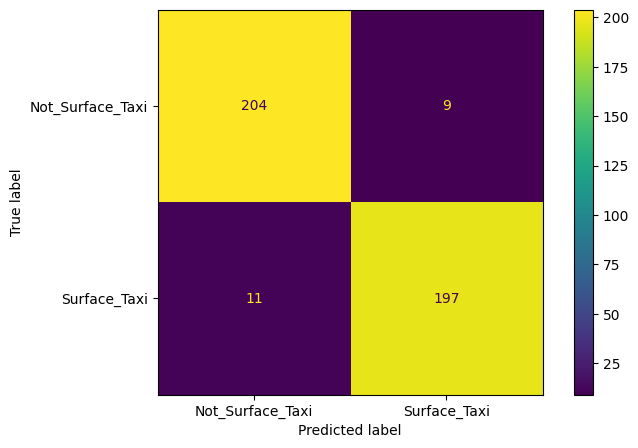

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_Surface_Taxi', 'Surface_Taxi'])
cmp.plot(ax=ax)
plt.show()

In [27]:
#Verify display labels are right
y_test.value_counts()

0    213
1    208
Name: surface, dtype: int64

In [28]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['surface']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [29]:
#SVM standard 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC()
#y_pred=svm.predict(X_test)

svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.9620


In [30]:
y_pred=svm.predict(X_test)

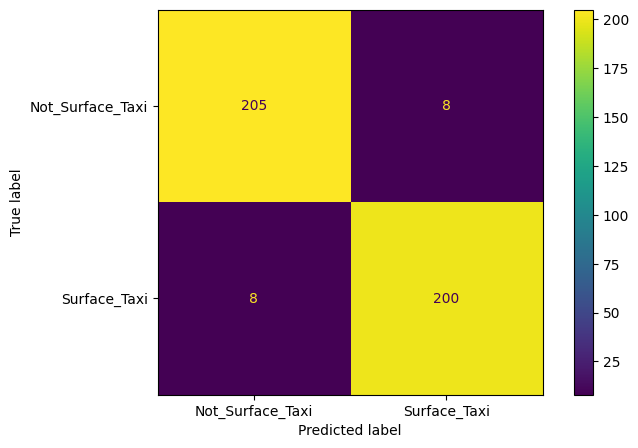

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_Surface_Taxi', 'Surface_Taxi'])
cmp.plot(ax=ax)
plt.show()

In [32]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['surface']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [33]:
#SVM standard 
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC()
#y_pred=svm.predict(X_test)

svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.81
Accuracy of SVM classifier on test set: 0.7601


In [34]:
y_pred=svm.predict(X_test)

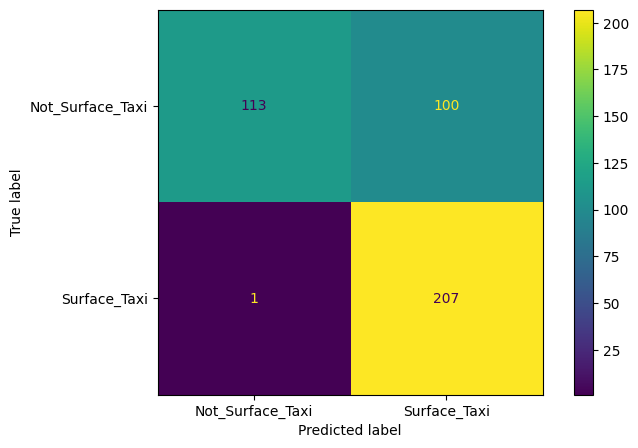

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_Surface_Taxi', 'Surface_Taxi'])
cmp.plot(ax=ax)
plt.show()